# Linear Regression

### In this exercice, we implement linear regression with one variable to predict profits for a food truck. We used this data to help select which city to expand to next, as the CEO of a restaurant franchise.
### The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
### the profit of a food truck in that city. A negative value for profit indicates a loss.
### In part 1, we used the mathematical methed to solve the problem.
### In part 2, we used Sclearn LinearRegression

##### Part1

In [106]:
import numpy as np

from matplotlib import pylab as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [107]:
data=np.loadtxt("ex1data1.txt", delimiter =',', unpack = False)
X,Y=data[:,0],data[:,1]
m=Y.size

Text(0, 0.5, 'Population of City in 10,000s')

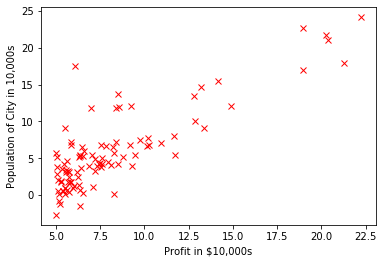

In [108]:
fig=plt.figure()
plt.plot(X,Y,'rx')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')

In [109]:
Z=np.stack([np.ones(m),X],axis=1)

In [110]:
def computeCost(X,Y,theta):
    h=np.dot(X,theta)
    m=Y.size
    J=0
    for i in range(m):
        J+=(h[i]-Y[i])**2
    return (1/(2*m))*J

In [111]:
theta=np.array([0,0])
theta

array([0, 0])

In [112]:
J=computeCost(Z,Y,theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07



In [113]:
theta=np.array([-1, 2])
J = computeCost(Z, Y, theta)
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [114]:
def gradientDescent(X,Y,theta,alpha, num_iters):
    m=Y.size
    J_history=np.zeros((num_iters,1))
    for i in range (num_iters):
        h=np.dot(X,theta)
        J=0
        for j in range(m):
            J+=(h[j]-Y[j])*X[j]
        delta=(1/m)*J
        theta=theta-alpha*delta
        
        J_history[i]=computeCost(X,Y,theta)
    
    return theta, J_history

In [115]:
theta = np.zeros(2)

iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(Z ,Y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


In [116]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



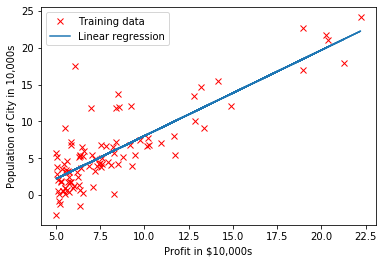

In [117]:
plt.plot(X,Y,'rx')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.plot(Z[:, 1], np.dot(Z, theta), '-')
plt.legend(['Training data', 'Linear regression']);

Text(0.5, 1.0, 'Contour, showing minimum')

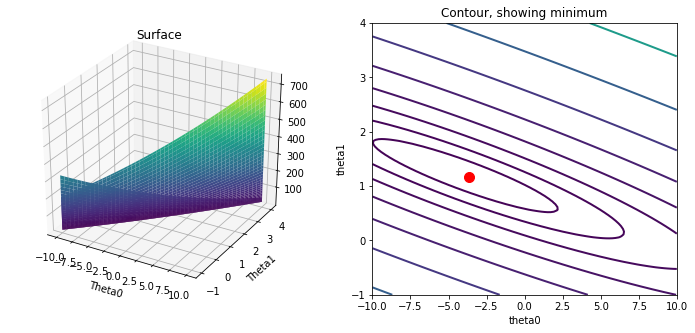

In [118]:
theta0=np.linspace(-10, 10, 100)
theta1=np.linspace(-1, 4, 100)

J_vals=np.zeros((theta0.shape[0],theta1.shape[0]))
for i in range(theta0.size):
    for j in range(theta1.size):
        t=np.array([theta0[i],theta1[j]])
        J_vals[i,j]=computeCost(Z,Y,t)
J_vals = J_vals.T
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0, theta1,J_vals, cmap='viridis')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Surface')
ax = fig.add_subplot(122)
plt.contour(theta0, theta1, J_vals,linewidths=2, cmap='viridis',levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')

##### Part2

In [119]:
data=np.loadtxt("ex1data1.txt", delimiter =',', unpack = False)
X,Y=data[:,0],data[:,1]
m=Y.size

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
LR=LinearRegression()
LR.fit(X.reshape(-1,1),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

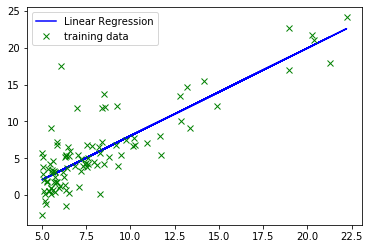

In [122]:
prediction=LR.predict(X.reshape(-1,1))
fig=plt.figure()
plt.plot(X,prediction,label='Linear Regression', color='b')
plt.plot(X,Y,'rx',label='training data', color='g')
plt.legend()
